# Lecture 4 - Linear Regression cont., Generalization & Regularization

## Polynomial Curve Fitting continued...

<div class="alert alert-success">
    <b>Step 4 - Model Fitting</b> 

Also referred as training the model.

We *fit* the polynomial function model such that the *objective function* $J(\mathbf{w})$ is minimized, i.e. we *optimize* the following error function

\begin{align}
J(\mathbf{w}) &= \frac{1}{2} \left(\mathbf{X}\mathbf{w} - \mathbf{t}\right)^T \left(\mathbf{X}\mathbf{w} - \mathbf{t}\right) \\
&= \frac{1}{2} \left\Vert \mathbf{X}\mathbf{w} - \mathbf{t} \right\Vert_2^2
\end{align}

* This function is called the **least squares error** objective function.

The optimization function is then:
$$\arg_{\mathbf{w}}\min J(\mathbf{w})$$ 
</div>

* So, we want $J(\mathbf{w})$ to be small. What is the set of parameters $\mathbf{w}$ that minimize the objective function $J(\mathbf{w})$?

* What do you mean by **optimize** $J(\mathbf{w})$? **How do you find $\mathbf{w}$?**

* To do that, we **take the derivative of $J(\mathbf{w})$ with respect to the parameters $\mathbf{w}$**.

* The derivative of the scalar $J(\mathbf{w})$ with respect to the vector $\mathbf{w}=[w_0,w_1,\dots,w_M]^T$ is a **vector**, and it corresponds to take the derivative of $J(\mathbf{w})$ with respect to every element in $\mathbf{w}$:

$$\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}} = \left[ \frac{\partial J(\mathbf{w})}{\partial w_0},  \frac{\partial J(\mathbf{w})}{\partial w_1}, \ldots,  \frac{\partial J(\mathbf{w})}{\partial w_M} \right]^T$$

* If we rewrite the objective function as:
\begin{align}
J(\mathbf{w}) &= \frac{1}{2} \left( \mathbf{X}\mathbf{w} - \mathbf{t}\right)^T\left( \mathbf{X}\mathbf{w} - \mathbf{t}\right) \text{, apply the transpose} \\
& = \frac{1}{2} \left( \mathbf{w}^T\mathbf{X}^T - \mathbf{t}^T\right)\left( \mathbf{X}\mathbf{w} - \mathbf{t}\right)\text{, apply the distributive property}  \\
& = \frac{1}{2} \left(\mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w} - \mathbf{w}^T\mathbf{X}^T \mathbf{t} - \mathbf{t}^T\mathbf{X}\mathbf{w} + \mathbf{t}^T\mathbf{t}\right)
\end{align}


* Solving for $\mathbf{w}$, we find:

\begin{align}
\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}} &= 0 \\
\frac{\partial }{\partial \mathbf{w}} \left[\frac{1}{2} \left(\mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w} - \mathbf{w}^T\mathbf{X}^T \mathbf{t} - \mathbf{t}^T\mathbf{X}\mathbf{w} + \mathbf{t}^T\mathbf{t}\right) \right] &= 0 \\
\frac{\partial }{\partial \mathbf{w}} \left[ \left(\mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w} - \mathbf{w}^T\mathbf{X}^T \mathbf{t} - \mathbf{t}^T\mathbf{X}\mathbf{w} + \mathbf{t}^T\mathbf{t}\right) \right] &= 0\text{, apply product rule for the first term} \\
(\mathbf{X}^T\mathbf{X}\mathbf{w})^T + \mathbf{w}^T\mathbf{X}^T\mathbf{X} - (\mathbf{X}^T \mathbf{t})^T - \mathbf{t}^T\mathbf{X} &=0 \\
\mathbf{w}^T\mathbf{X}^T\mathbf{X} + \mathbf{w}^T\mathbf{X}^T\mathbf{X} - \mathbf{t}^T\mathbf{X} - \mathbf{t}^T\mathbf{X} &= 0\\
2 \mathbf{w}^T\mathbf{X}^T\mathbf{X} &= 2 \mathbf{t}^T\mathbf{X} \\
(\mathbf{w}^T\mathbf{X}^T\mathbf{X})^T &= (\mathbf{t}^T\mathbf{X})^T\text{, apply transpose on both sides} \\
\mathbf{X}^T\mathbf{X}\mathbf{w} &= \mathbf{X}^T\mathbf{t} \\
\mathbf{w} &= \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{t}
\end{align}

* This gives us the **optimal set of parameters** $\mathbf{w}^*$ that minimize the objective function $J(\mathbf{w})$ for the training data $\{X,\mathbf{t}\}_{i=1}^N$, and so,

$$\mathbf{w}^* = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{t}$$

* So, for all pair of input data points $(x_i,t_i)$, we can write the estimated value of $t_i$ as:

$$\hat{t}_i = y_i = {\mathbf{w}^*}^T\phi(x_i)$$

For all data points in matrix form $\mathbf{X}$, we can write:

$$\hat{\mathbf{t}} = \mathbf{y} = X\mathbf{w}$$

<div class="alert alert-info">

Here is a quick video review of inverse matrices: [Season 1 Episode 7 of 3Blue1Brown Series](https://www.youtube.com/watch?v=uQhTuRlWMxw&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=8&t=33s)
</div>

**Test Data**

After the model is trained (i.e. complete optimization of error function using the training labeled data), the **goal** is to *predict* the output values to *new*, unseen and unlabeled test data.

The steps in the test data are:
* **Step 1:** Extract (the same) features
* **Step 2:** Run through the trained model using the optimal set of parameters $\mathbf{w}^*$ to find the output value

## Code Implementation

**What can you control?** 

<!-- * Training data -- in some cases we can't control the training data,
* Model order, and
* Feature vectors or *basis functions* -->

How would you implement linear regression using polynomial features?
 * Let's see with an example.

### Example: Suppose Input Data is sampled from a (noisy) sine curve 

Suppose our data comes from a noisy sinusoidal: $t = \sin(2\pi x) + \epsilon$ where $\epsilon$ is a (univariate) Gaussian zero-mean random noise. 

* The univariate Gaussian Distribution is defined as:
	\begin{eqnarray}
		\mathcal{N}(x | \mu, \sigma^2) = \frac{1}{(2\pi \sigma^2)^{1/2}} \exp\left\{ - \frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2\right\}
	\end{eqnarray}

    where $\mu$ is the mean and $\sigma^2$ is the variance. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

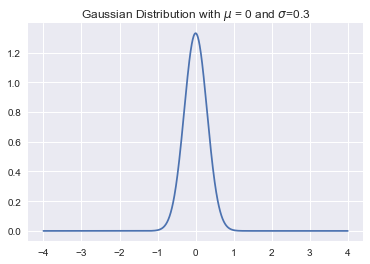

In [2]:
mu = 0
sigma = 0.3
N = 1000

def gaussian(x, mu, sig):
    return np.exp(-0.5*((x-mu)/sig)**2)/(2*np.pi*sig**2)**0.5

xrange = np.linspace(-4,4,N)

plt.plot(xrange,gaussian(xrange,mu,sigma))
plt.title('Gaussian Distribution with $\mu$ = '+str(mu)+' and $\sigma$='+str(sigma));

* If the noise is zero-mean Gaussian distributed, it is like we are saying there is a Gaussian around the true curve: 

\begin{eqnarray}
		 t = y + \epsilon\\
		 \epsilon = t - y
	 \end{eqnarray}
	 where
	 \begin{eqnarray}
	 	\epsilon \sim \mathcal{N}(0, \sigma^2)
 	 \end{eqnarray}
 	 thus
 	 \begin{eqnarray}
 	 	\mathcal{N}(t-y|0,1) &\propto& \exp\left\{ -\frac{1}{2} \frac{(t-y-0)^2}{1^2} \right\}\\
 	 	&=& \exp\left\{ -\frac{1}{2} (t-y)^2 \right\}\\
 	 	&=&  \exp\left\{ -J(\mathbf{w}) \right\}
 	\end{eqnarray}

* The **least squares** objective function, $J(\mathbf{w})$, assumes Gaussian noise. 

    * Another way to look at it: the desired values, $t$, are distributed according to a Gaussian distribution with mean $y$!

Let's generate data from the *true* underlying function (which, in practice, we would not know).

In [3]:
def NoisySinusoidalData(N, a, b, gVar):
    '''NoisySinusoidalData(N, a, b, gVar): Generates N data points in the range [a,b] 
    sampled from a sin(2*pi*x) with additive zero-mean Gaussian random noise with standard deviation gVar'''
    x = np.linspace(a,b,N) # N input samples, evenly spaced numbers between [a,b]
    noise = np.random.normal(0,gVar,N) # draw N sampled from a univariate Gaussian distribution with mean 0, gVar standard deviation and N data points
    t = np.sin(2*np.pi*x) + noise # desired values, noisy sinusoidal 
    return x, t

In [4]:
# Generate input samples and desired values

N = 40 # number of training data samples
Ntest = 10 # number test data samples
a, b = [0,1] # data samples interval
gVar_train = 0.5 # standard deviation of the zero-mean Gaussian noise observed in the training samples
gVar_test = 1 # standard deviation of the zero-mean Gaussian noise observed in the testing samples
x1, t1 = NoisySinusoidalData(N, a, b, gVar_train) # Training Data - Noisy sinusoidal
x2, t2 = NoisySinusoidalData(N, a, b, 0) # True Sinusoidal - in practice, we don't the true function
x3, t3 = NoisySinusoidalData(Ntest, a, b, gVar_test) # Test Data - Noisy sinusoidal

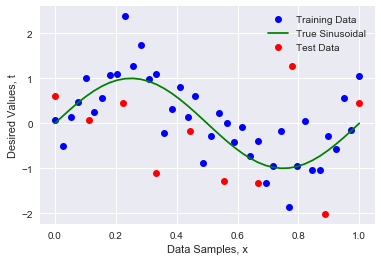

In [5]:
plt.plot(x1, t1, 'bo', label = 'Training Data')
plt.plot(x2, t2, 'g', label = 'True Sinusoidal')
plt.plot(x3, t3, 'ro', label = 'Test Data')
plt.legend()
plt.xlabel('Data Samples, x')
plt.ylabel('Desired Values, t');

Now let's fit the data using the *polynomial regression* model:

In [6]:
def PolynomialRegression(x,t,M):
    '''PolynomialRegression(x,t,M): Fit a polynomial of order M to the data input data x and desire values t'''	
    X = np.array([x**m for m in range(M+1)]).T #computes the feature vector phi(x) = [x^0, x^1, ...., x^M]
    w = np.linalg.inv(X.T@X)@X.T@t # Optimal set of parameters w
    y = X@w
    error = y - t
    return w, y, error

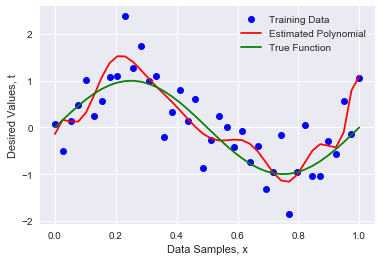

In [7]:
# Model Order
M = 13

# Find the parameters that fit the noisy sinusoidal
w, y, error = PolynomialRegression(x1,t1,M) 

plt.plot(x1,t1,'bo', label='Training Data')
plt.plot(x1,y,'r', label = 'Estimated Polynomial')
plt.plot(x2,t2,'g', label = 'True Function')
plt.legend()
plt.xlabel("Data Samples, x")
plt.ylabel("Desired Values, t");

* How do the weights look like? - Regularization

In [8]:
print(w)

[-1.41811182e-01  2.35789674e+01 -5.12655855e+02  3.78751000e+02
  9.75187290e+04 -1.19632371e+06  7.03291225e+06 -2.48673668e+07
  5.70694195e+07 -8.72131173e+07  8.82341706e+07 -5.68059756e+07
  2.10831792e+07 -3.43430537e+06]


Let's see how well does this trained model **generalizes** to the **test data**, to which we do **not** have labels.

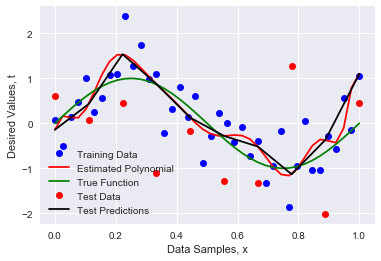

In [9]:
# Apply the parameters following the equation y = X*w or y = Phi * w in the Polynomial Regression case
X_test = np.array([x3**m for m in range(M+1)]).T #computes the phi(x) = [x^0, x^1, ...., x^M]
y_test = X_test@w 

plt.plot(x1,t1,'bo', label='Training Data')
plt.plot(x1,y,'r', label = 'Estimated Polynomial')
plt.plot(x2,t2,'g', label = 'True Function')
plt.plot(x3,t3,'ro', label = 'Test Data')
plt.plot(x3,y_test,'k', label = 'Test Predictions')
plt.legend()
plt.xlabel("Data Samples, x")
plt.ylabel("Desired Values, t");

* What happens when the test points fall outside the range of what the model has *learned*?

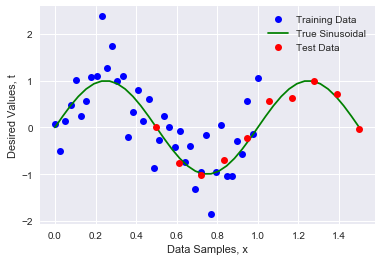

In [10]:
x4, t4 = NoisySinusoidalData(10, 0.5, 1.5, 0.1)
x2, t2 = NoisySinusoidalData(N, 0, 1.5, 0)

plt.plot(x1, t1, 'bo', label = 'Training Data')
plt.plot(x2, t2, 'g', label = 'True Sinusoidal')
plt.plot(x4, t4, 'ro', label = 'Test Data')
plt.legend()
plt.xlabel('Data Samples, x')
plt.ylabel('Desired Values, t');

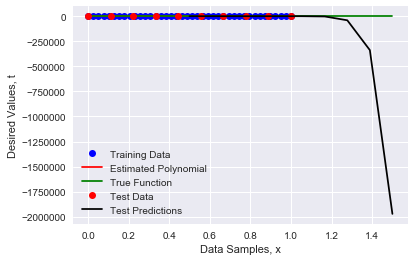

In [11]:
X_test = np.array([x4**m for m in range(M+1)]).T #computes the phi(x) = [x^0, x^1, ...., x^M]
y_test = X_test@w 

plt.plot(x1,t1,'bo', label='Training Data')
plt.plot(x1,y,'r', label = 'Estimated Polynomial')
plt.plot(x2,t2,'g', label = 'True Function')
plt.plot(x3,t3,'ro', label = 'Test Data')
plt.plot(x4,y_test,'k', label = 'Test Predictions')
plt.legend()
plt.xlabel("Data Samples, x")
plt.ylabel("Desired Values, t");

* How do we select the *best* model order? - Cross-validation

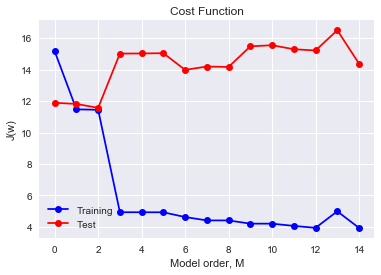

In [12]:
# Find the Least Squares error for different model orders M

J_train = []
J_test = []
for M in range(15):
    w, y, error_training = PolynomialRegression(x1,t1,M)
    X_test = np.array([x3**m for m in range(M+1)]).T
    y_test = X_test@w  
    error_Test = y_test - t3
    J_train+=[np.sum(error_training**2)/2]
    J_test+= [np.sum(error_Test**2)]

plt.plot(J_train,'bo-', label = 'Training')
plt.plot(J_test,'ro-', label = 'Test')
plt.title('Cost Function')
plt.legend()
plt.xlabel('Model order, M')
plt.ylabel('J(w)');

## Using libraries

We can also implement linear regression using the function ```LinearRegression``` from the module ```linear_model``` within the library ```sklearn```.

* Check out ```scikit-learn``` documentation on ```LinearRegression``` model [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

* Check out 

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression().fit(x1[:,np.newaxis], t1)

print(model.score(x1[:,np.newaxis], t1[:,np.newaxis]))
print('The equation of the line is: y = ' + str(model.coef_[0]) + '*x + ' + str(model.intercept_))

0.24337683812135757
The equation of the line is: y = -1.4511185295383084*x + 0.8296513067065523


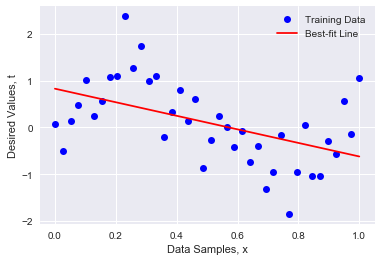

In [15]:
yfit = model.predict(x1[:, np.newaxis])
# yfit3 = model.predict(x3[:,np.newaxis])

plt.plot(x1,t1, 'bo', label = 'Training Data')
plt.plot(x1, yfit, 'r', label = 'Best-fit Line')
# plt.plot(x3,t3, 'ro', label = 'Test Data')
# plt.plot(x3, yfit3, 'k', label = 'Best-fit Line Test')
plt.legend()
plt.xlabel("Data Samples, x")
plt.ylabel("Desired Values, t");

In [16]:
from sklearn.preprocessing import PolynomialFeatures

M = 3
poly = PolynomialFeatures(M, include_bias=True)
poly.fit_transform(x1[:,np.newaxis]);

In [17]:
from sklearn.pipeline import make_pipeline

M = 3
poly_model = make_pipeline(PolynomialFeatures(M),LinearRegression())

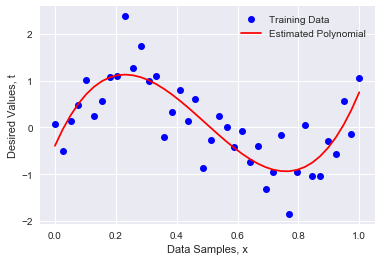

In [18]:
poly_model.fit(x1[:, np.newaxis], t1)
yfit = poly_model.predict(x1[:, np.newaxis])
# yfit3 = poly_model.predict(x3[:,np.newaxis])

plt.plot(x1,t1, 'bo', label = 'Training Data')
plt.plot(x1, yfit, 'r', label = 'Estimated Polynomial')
# plt.plot(x3,t3, 'ro', label = 'Test Data')
# plt.plot(x3, yfit3, 'k', label = 'Test Predictions')
plt.legend()
plt.xlabel("Data Samples, x")
plt.ylabel("Desired Values, t");

# Generalization

In Machine Learning, we want our supervised learning model to be able to *generalize* knowledge acquired from the training stage to new unknown data. So we don't want to train the model such that it *memorizes* the training samples, nor we want to make the model so simple that is simply doesn't work. These two situations are known as **overfitting** and **underfitting** respectively.

<div class="alert alert-success">
    <b>Generalization</b> 

A model is said to have **generalization** abilities if it can *properly* adapt to new and unseen data that follows the same distribution as the one used to train the model.
</div>


## Overfitting/Overtraining & Underfitting/Undertraining

After selecting our *linear model*, the only parameter we can *control* is the *model order* $M$.

* As $M$ increases, there are more parameters (more elements in the vector $\mathbf{w}$) to learn and, so, the model becomes more complex.

* The order $M$ regulates the model *complexity*.
    * In a Polynomial regresssion it also controls the richness of the feature space. 

As a model that is *complex*, it is more likely to *overfit* or *overtrain*.
* This essentially means it may "memorize" the input training data,
* Including all of the training data's noise!

<div class="alert alert-success">
    <b>Overfitting</b> 

In model fitting, a model is said to have **overfit** to the training data, if it is *not* able to *generalize* to new and unknown data. We can observe this effect as the training error is small but the error in the test data is very large.

In other words, overfitting means that the *true* underlying model of the data is not estimated/learned properly, instead the model returned a poor representation that memorized meaningless noise in the data.
</div>

<div class="alert alert-success">
    <b>Underfitting</b> 

In model fitting, a model is said to have **underfit** if the error in both in training and test data sets are still decreasing. 

An underfit model is not complex enough to model all the characteristics in the data.
</div>

<div><img src="figures/Under_vs_Overfitting.png", width="600"><!div>

### How to avoid overfitting?

Suppose you have $N$ data points and you are trying to estimate $M$ coefficients. In other words, you are solving a set of $M$ equations with $N$ variables. 

**1. What happens when we have more unknowns than known variables, i.e., $M > N$?** In other words, what happens when the data matrix, $\mathbf{X}^T\mathbf{X}$, is **not** full rank?
* Review span and rank: Youtube 3Blue1Brown channel episode ["Inverse matrices, column space and null space"](https://www.youtube.com/watch?v=uQhTuRlWMxw&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=7)

**2. How can you avoid overfitting?**

* **Cross-validation**: tests the model's ability to predict new data that was not used in estimating the model, in order to flag problems like *overfitting* or *selection bias* and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset).
* **More data**: As you have more and more data, it becomes more and more difficult to "memorize" the data and its noise. Often, more data translates to the ability to use a more complex model and avoid overfitting. Adding more data, also allows the data matrix, $\mathbf{X}^T\mathbf{X}$, to *explain* the entire $M$-dimensional space and prevent it from becoming *singular*.
    * However, generally, you need exponentially more data with increases to model complexity.  So, there is a limit to how much this helps. If you have a very complex model, you need a huge training data set. 
    * (Note: A matrix is said to be *singular* if its determinant is equal to zero, this means it is **not** invertible.)
* **Regularization**: add a penalty term to the error function to discourage learning a more complex model by forcing the model parameters to be small.

<div class="alert alert-success">
    <b>k-fold Cross-Validation</b> 

The goal of **cross-validation** is to test the model's ability to predict new data that was not used in estimating the model, in order to flag problems like *overfitting* or *selection bias* and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset).

The technique of **S-fold cross-validation**, illustrated below for the case of $S = 4$, involves taking the available data and partitioning it into $S$ groups (in the simplest case these are of equal size). Then $S-1$ of the groups are used to train a set of models that are then evaluated on the remaining group. This procedure is then repeated for all $S$ possible choices for the held-out group, indicated in the picture below by the red blocks, and the performance scores from the S runs are then averaged.
</div>

<div><img src="figures/SfoldCrossValidation.png", width="300"><!div>

<div class="alert alert-success">
    <b>Regularization</b> 

**Regularization** contrains/*regularizes* or shrinks the parameter coefficients such that they cannot take a large value. Regularization of the model parameters discourages learning a more complex, so to avoid the risk of overfitting.

$$E_W(\mathbf{w}) = \frac{1}{2}\mathbf{w}^T\mathbf{w} = \left\Vert\mathbf{w}\right\Vert_2^2$$

where

$$E(\mathbf{w}) = E_D(\mathbf{w}) + \lambda E_W(\mathbf{w}) = \frac{1}{2} \left\Vert \mathbf{X}\mathbf{w} - \mathbf{t} \right\Vert^2_2 + \lambda\frac{1}{2}\left\Vert\mathbf{w}\right\Vert_2^2$$

where $\lambda$ is the regularization coefficient that controls the relative importance of the data-dependent error $E_D(\mathbf{w})$ and the regularization term $E_W(\mathbf{w})$.
</div>

* This particular choice of regularizer is known in the machine learning literature as *weight decay* or *ridge regularizer* because in sequential learning algorithms, it encourages weight values to decay towards zero, unless supported by the data.

* It has the advantage that the error function remains a quadratic function of $\mathbf{w}$, and so its exact minimizer can be found in closed form.

* A more general regularizer is sometimes used, for which the regularized error takes the form:

$$E(\mathbf{w}) = \frac{1}{2} \left\Vert \mathbf{X}\mathbf{w} - \mathbf{t} \right\Vert^2_2 + \lambda\frac{1}{2}\left|\mathbf{w}\right|^q$$

where $q=2$ corresponds to the quadratic regularizer. 
* The case of $q = 1$ is known as the *lasso* regularizer. It has the property that if $\lambda$ is sufficiently large, some of the coefficients $w_j$ are driven to zero, leading to a *sparse* model in which the corresponding basis
functions play no role.

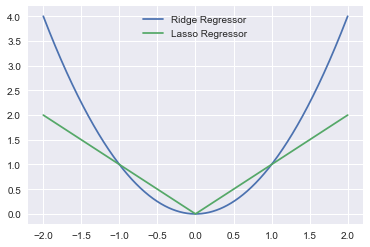

In [19]:
xrange = np.linspace(-2,2,1000)

plt.plot(xrange,xrange**2, label = 'Ridge Regressor')
plt.plot(xrange,np.abs(xrange), label = 'Lasso Regressor')
plt.legend();

* Ridge Regularizer prefers to weight parameter elements to be non-zero.

* Ridge Regularizer is highly affected by outliers.

* Lasso Regularizer promotes sparsity.

* Lasso Regularizer not as affected by outliers.

<div class="alert alert-success">
    <b>Regularized Least Squares</b> 

We fit the linear regression model such that the *regularized* objective function $E(\mathbf{w})$ is minimized:

\begin{align}
& \arg_{\mathbf{w}}\min E(\mathbf{w}) \\ 
\text{where } E(\mathbf{w}) &= E_D(\mathbf{w}) + \frac{\lambda}{2} E_W(\mathbf{w}) \\
&= \frac{1}{2} \left\Vert \mathbf{X}\mathbf{w} - \mathbf{t} \right\Vert^2_2 + \lambda\frac{1}{2}\left\Vert\mathbf{w}\right\Vert_2^2 \\
&= \frac{1}{2} \left(\mathbf{X}\mathbf{w} - \mathbf{t}\right)^T\left(\mathbf{X}\mathbf{w} - \mathbf{t}\right) + \lambda\frac{1}{2} \mathbf{w}^T\mathbf{w} \\
&= \frac{1}{2} \left(\left(\mathbf{X}\mathbf{w} - \mathbf{t}\right)^T\left(\mathbf{X}\mathbf{w} - \mathbf{t}\right) + \lambda\mathbf{w}^T\mathbf{w}\right)
\end{align}

This is often referred to as the **ridge regression**.

The optimal solution $\mathbf{w}^*$ is:

$$\mathbf{w}^* = \left(\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I}\right)^{-1}\mathbf{X}^T\mathbf{t} $$

where $\mathbf{I}$ is an identity matrix of size $(M+1)\times (M+1)$.
</div>

* We are **diagonally loading** the matrix $\mathbf{X}^T\mathbf{X}$ with the regularizer term $\lambda$.
* This is "filling" the feature space such that the matrix $\mathbf{X}^T\mathbf{X}$ becomes full rank.
* What happens when $\lambda \rightarrow \infty$?

## Exercise

* In code, how would you change the function ```PolynomialRegression``` created above to include the regularization term?

* How could you incorporate regularizer into a ```scikit-learn``` pipeline?

* How about variables normalizaion -- pre-processing?

In [21]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

M = 3
poly_model = make_pipeline(StandardScaler(),PolynomialFeatures(M),Ridge(0.01))

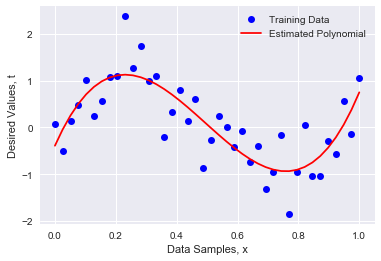

In [22]:
poly_model.fit(x1[:, np.newaxis], t1)
yfit = poly_model.predict(x1[:, np.newaxis])
# yfit3 = poly_model.predict(x3[:,np.newaxis])

plt.plot(x1,t1, 'bo', label = 'Training Data')
plt.plot(x1, yfit, 'r', label = 'Estimated Polynomial')
# plt.plot(x3,t3, 'ro', label = 'Test Data')
# plt.plot(x3, yfit3, 'k', label = 'Test Predictions')
plt.legend()
plt.xlabel("Data Samples, x")
plt.ylabel("Desired Values, t");